## Assignment is below at the bottom

Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [2]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [28]:

# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [29]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])                )

In [38]:
encoded_imgs

array([[11.943697 ,  9.005527 , 12.027234 , 32.89881  ],
       [23.76052  , 13.926956 ,  5.6552634,  8.942506 ],
       [35.62965  , 34.729908 , 24.666973 , 41.5047   ],
       ...,
       [ 5.3135986, 11.108302 , 14.398285 , 17.106884 ],
       [ 4.376413 , 19.419018 , 15.854642 , 11.992302 ],
       [ 7.41167  , 18.699078 , 30.420742 , 11.0364065]], dtype=float32)

In [52]:
noise = np.random.normal(20,4, (4,4))
noise_preds = decoder.predict(noise)

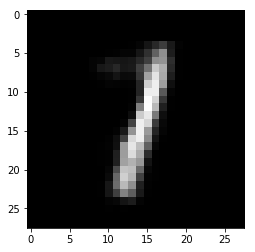

In [55]:
plt.imshow(noise_preds[1].reshape(28,28))

In [41]:
np.max(encoded_imgs)

54.59457

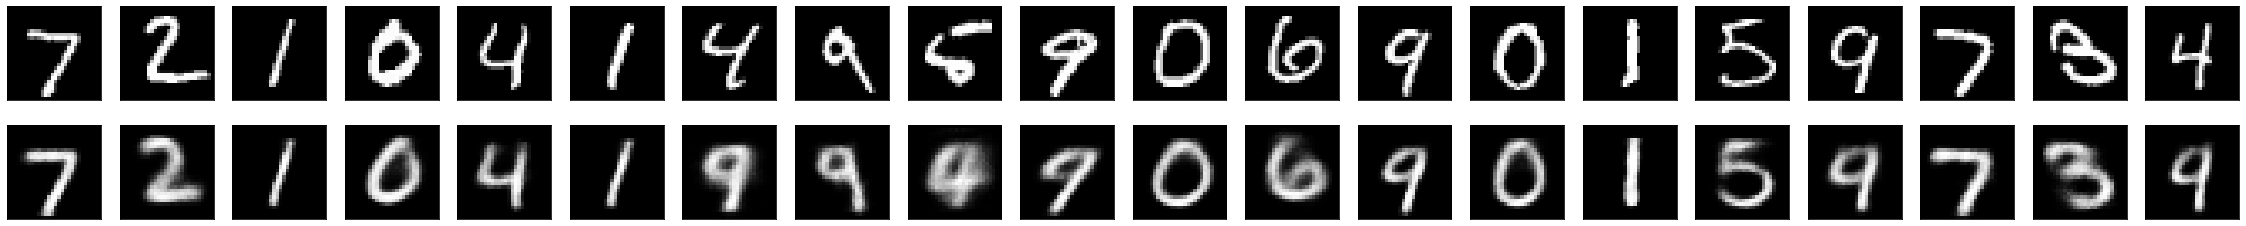

In [32]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [33]:
encoded_imgs

array([[11.943697 ,  9.005527 , 12.027234 , 32.89881  ],
       [23.76052  , 13.926956 ,  5.6552634,  8.942506 ],
       [35.62965  , 34.729908 , 24.666973 , 41.5047   ],
       ...,
       [ 5.3135986, 11.108302 , 14.398285 , 17.106884 ],
       [ 4.376413 , 19.419018 , 15.854642 , 11.992302 ],
       [ 7.41167  , 18.699078 , 30.420742 , 11.0364065]], dtype=float32)

In [26]:
%matplotlib inline

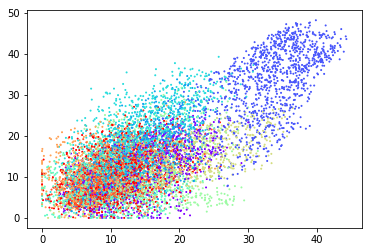

In [34]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
# plt.show()

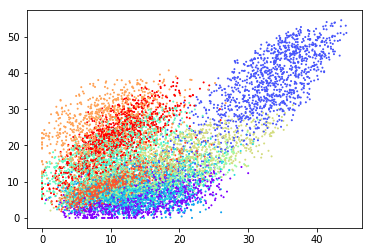

In [35]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

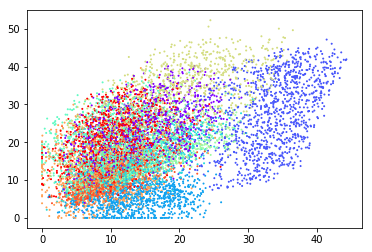

In [36]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
# plt.show()

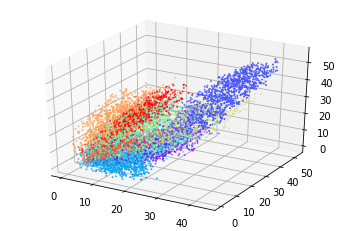

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

# Assignment


1. change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot


In [ ]:
losses = []
for encoding_dim in dimensions:
    
    loss = 
    losses.append(loss)
    



2. **_After_** training an autoencoder with `encoding_dim=8`, apply noise (like the previous assignment) to *_only_* the input of the trained autoencoder (not the output). The output images should be without noise. 

Print a few noisy images along with the output images to show they don't have noise.

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Thu Aug 15 11:21:22 2019
@author: suchismitasa
"""

import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image

# Data Preprocessing

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform  = tv.transforms.Compose([tv.transforms.ToTensor(), tv.transforms.Normalize((0.1307,), (0.3081,))])
trainset = tv.datasets.MNIST(root='./data',  train=True,download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False, num_workers=4)
testset = tv.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Defining Model

class Autoencoder(nn.Module):

    def __init__(self):
        super(Autoencoder,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(6,16,kernel_size=5),
            nn.ReLU(True))

        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(16,6,kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(6,1,kernel_size=5),
            nn.ReLU(True),
            nn.Sigmoid())

    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# Defining Parameters

num_epochs = 5
batch_size = 128
model = Autoencoder().cpu()
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),weight_decay=1e-5)

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = Variable(img).cpu()
        # ===================forward=====================
        output = model(img)
        loss = distance(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

epoch [1/5], loss:0.9752
epoch [2/5], loss:0.9749
epoch [3/5], loss:0.9749
epoch [4/5], loss:0.9749
epoch [5/5], loss:0.9748


In [4]:
!pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.5 MB/s eta 0:00:003.6 MB/s eta 0:00:01
